#### After testing GNILC - We explore the results generated by GNILC

In [3]:
import os
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

In [4]:
# load the fits files from output
file_path = "../GNILC/output/wavelet_0.fits"

hdul = fits.open(file_path)
print(hdul.info())     
data = hdul[0].data
print(data.shape, data.min(), data.max())
hdul.close()

Filename: ../GNILC/output/wavelet_0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (5, 257)   float64   
  1                1 ImageHDU         6   (12288,)   float64   
  2                1 ImageHDU         6   (49152,)   float64   
  3                1 ImageHDU         6   (196608,)   float64   
  4                1 ImageHDU         6   (786432,)   float64   
  5                1 ImageHDU         6   (786432,)   float64   
None
(257, 5) 0.0 1.0


wavelet_0.fits shape: (12288,), min: -51638.29707246646, max: 1989452.0581003837
wavelet_target_0.fits shape: (12288,), min: -0.1776994441279524, max: 0.12274095359743017
wavelet_50.fits shape: (12288,), min: -4968.1193519986555, max: 168417.2824785036
wavelet_target_50.fits shape: (12288,), min: -0.16094677417518657, max: 0.12840795245553852
wavelet_100.fits shape: (12288,), min: -1636.6894218288253, max: 53178.27827717159
wavelet_target_100.fits shape: (12288,), min: -0.17160634418550696, max: 0.1469542542049759
wavelet_150.fits shape: (12288,), min: -786.1121373750029, max: 24923.785106027895
wavelet_target_150.fits shape: (12288,), min: -0.17285711935089043, max: 0.14567109059773772
wavelet_200.fits shape: (12288,), min: -454.25472727782517, max: 14170.978166452736
wavelet_target_200.fits shape: (12288,), min: -0.17678218128675957, max: 0.13419049941462496


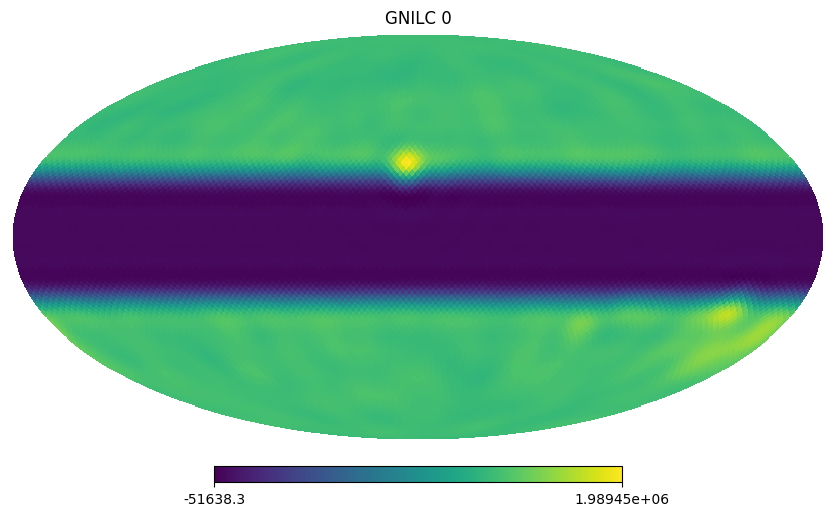

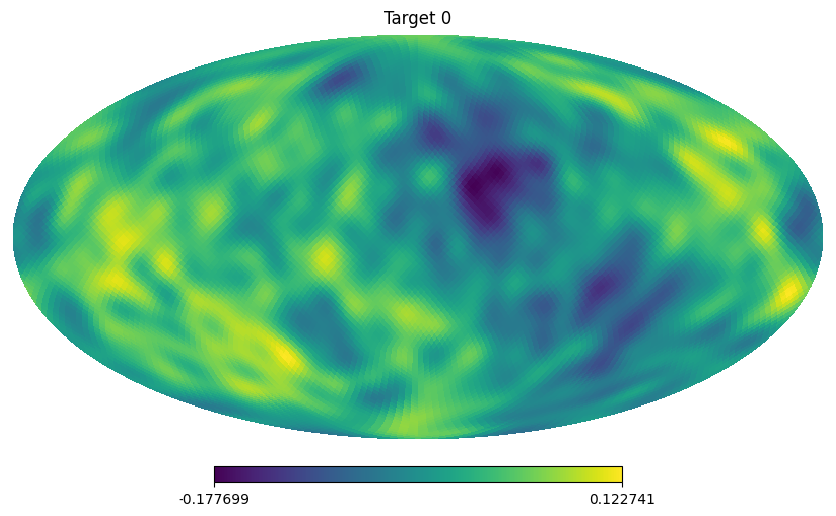

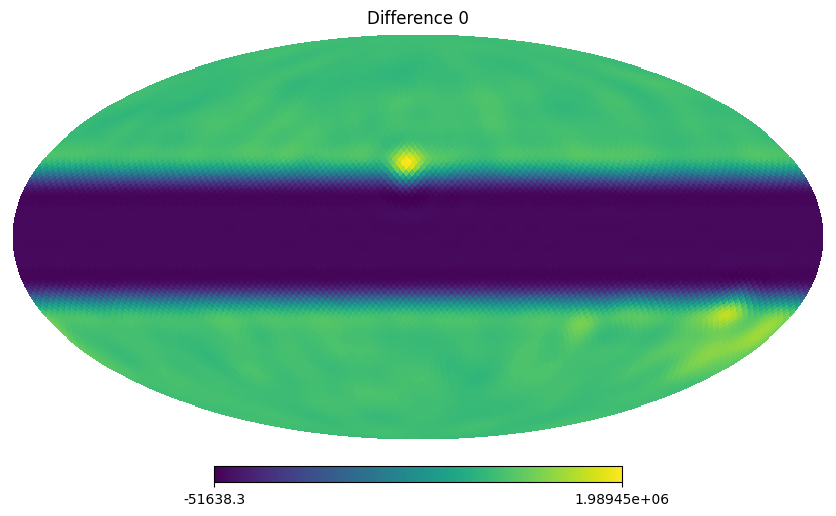

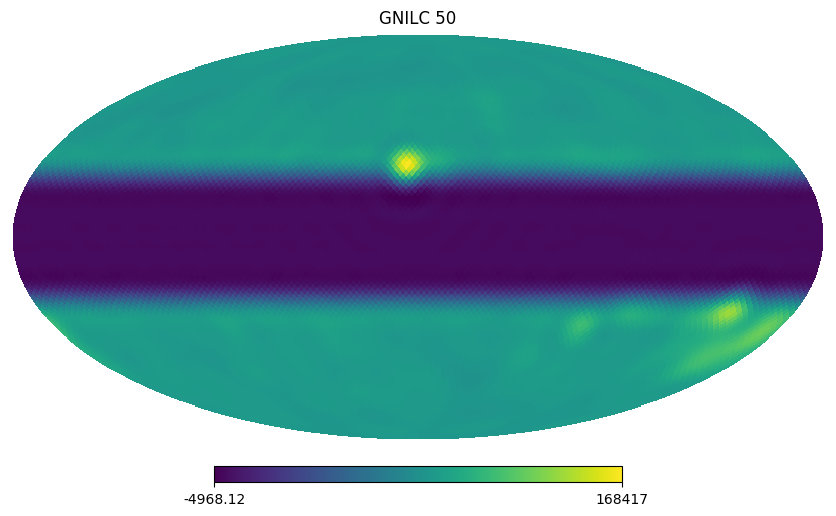

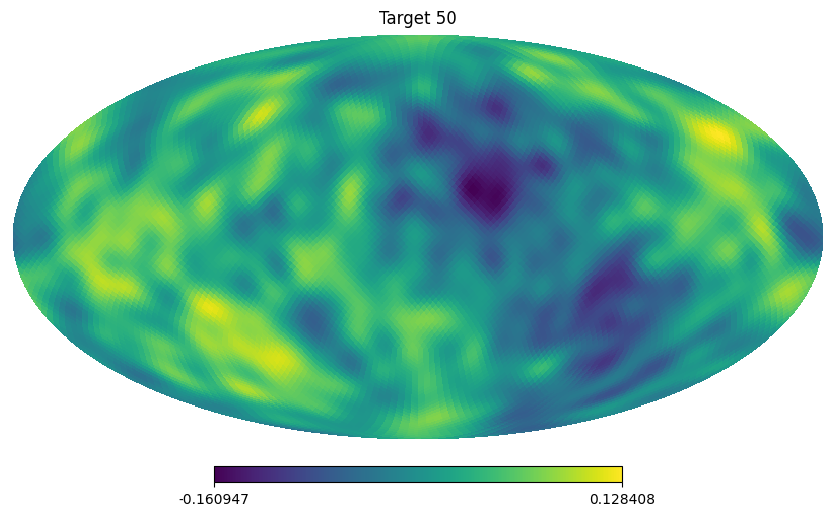

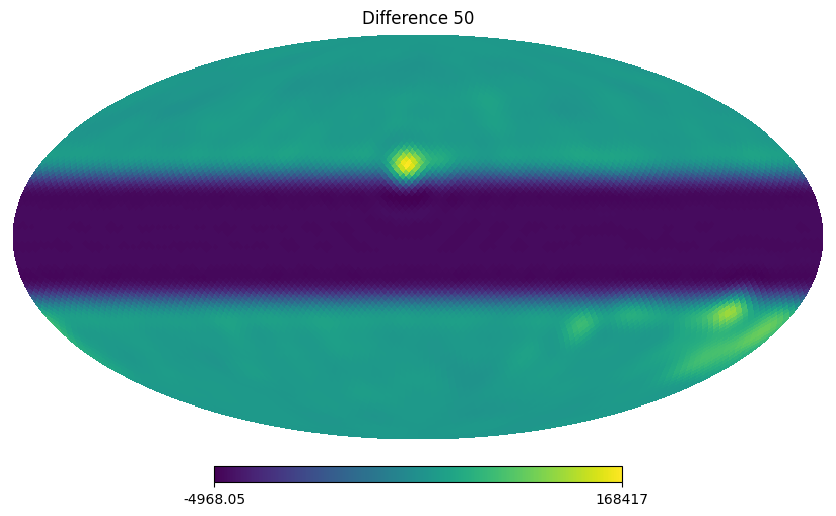

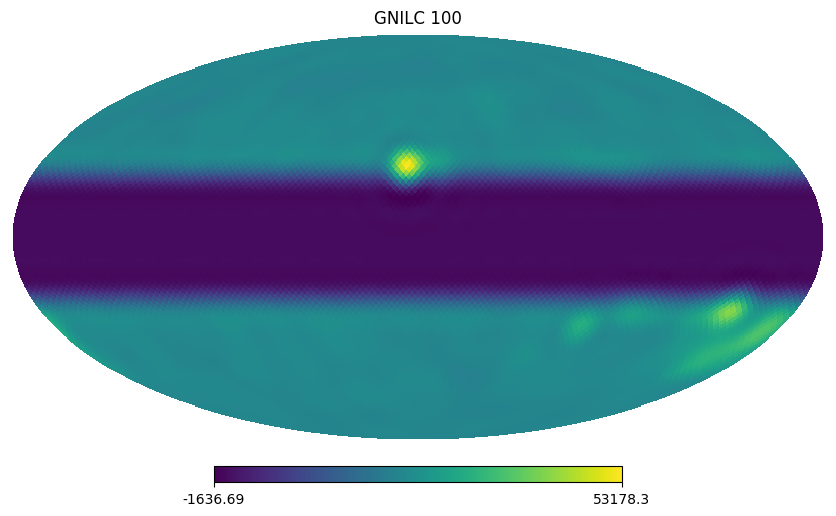

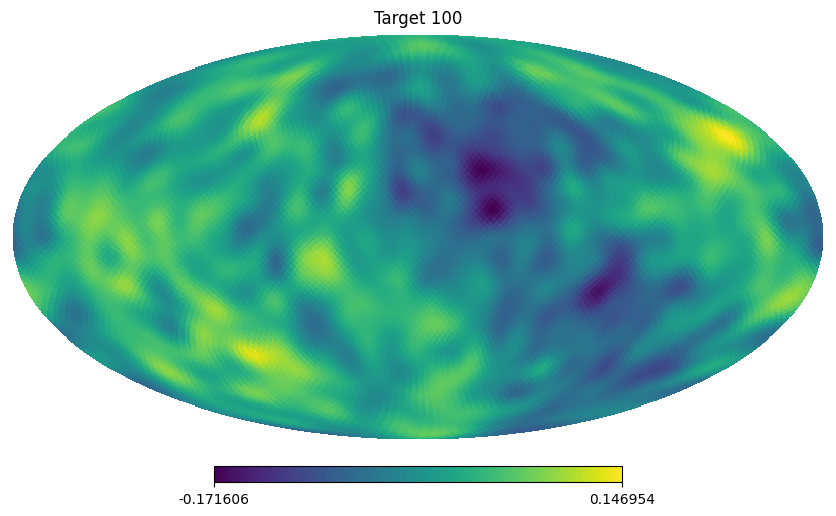

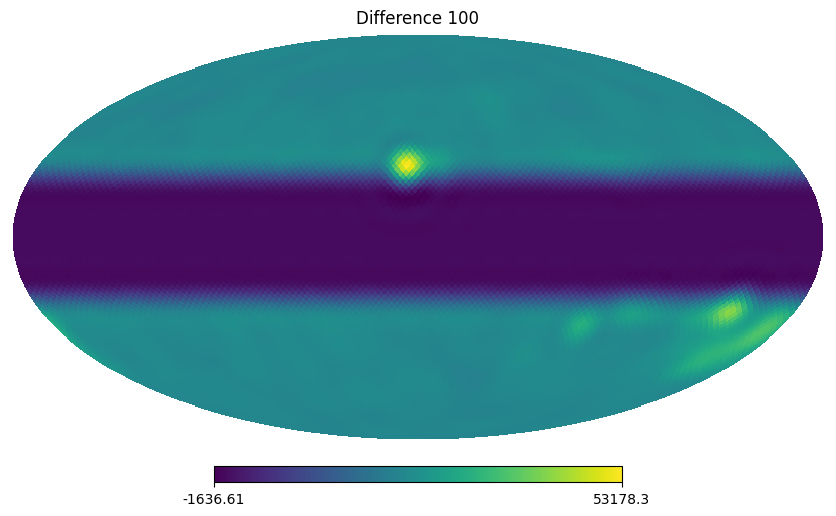

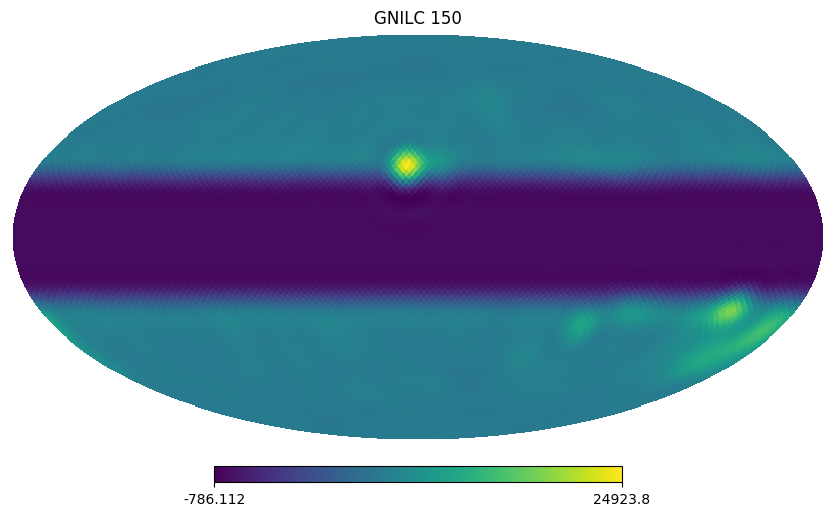

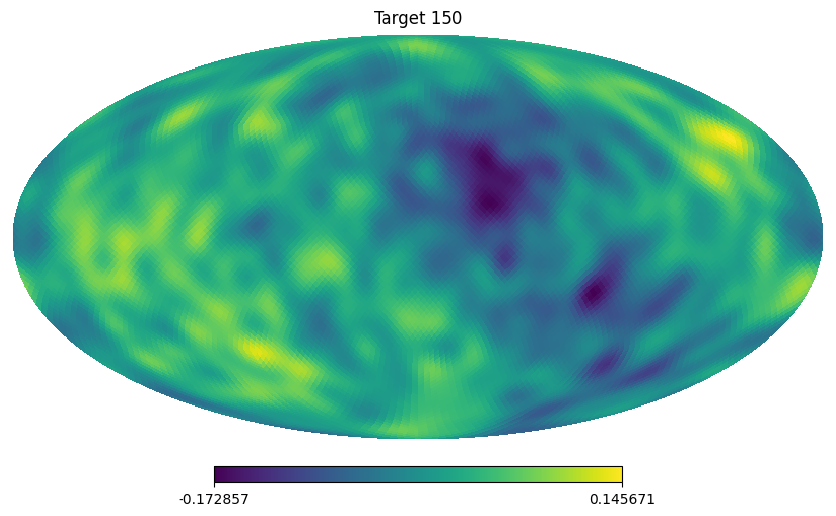

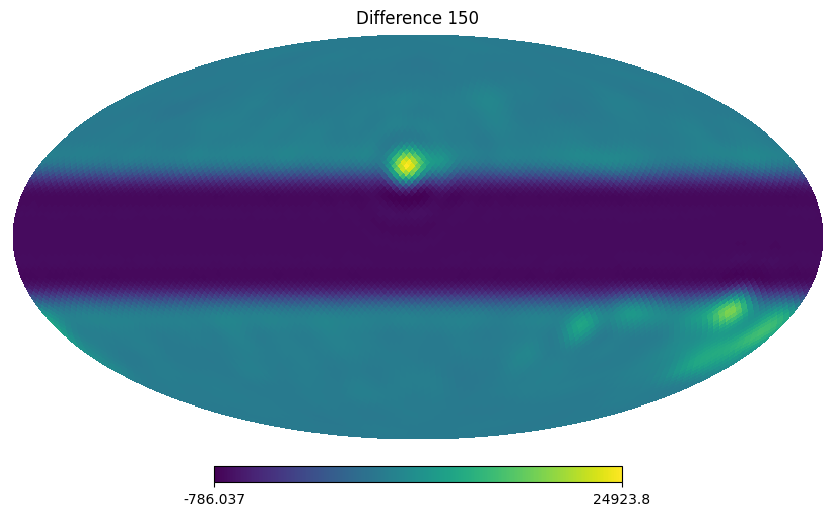

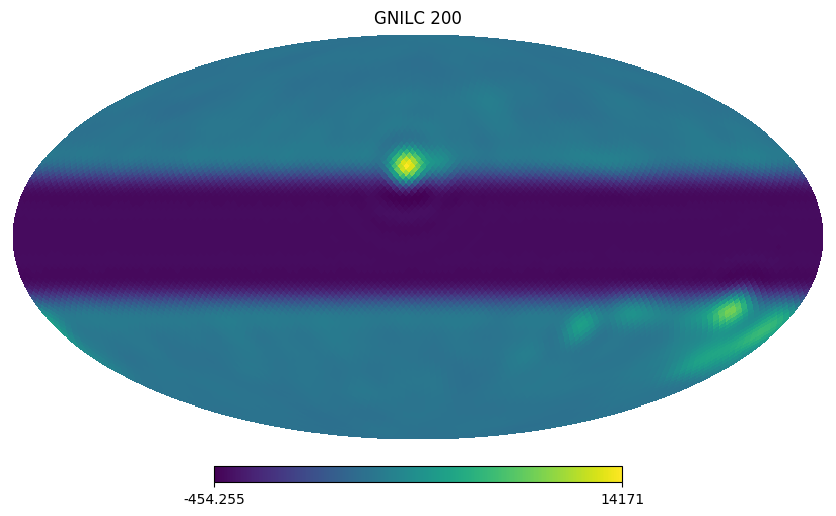

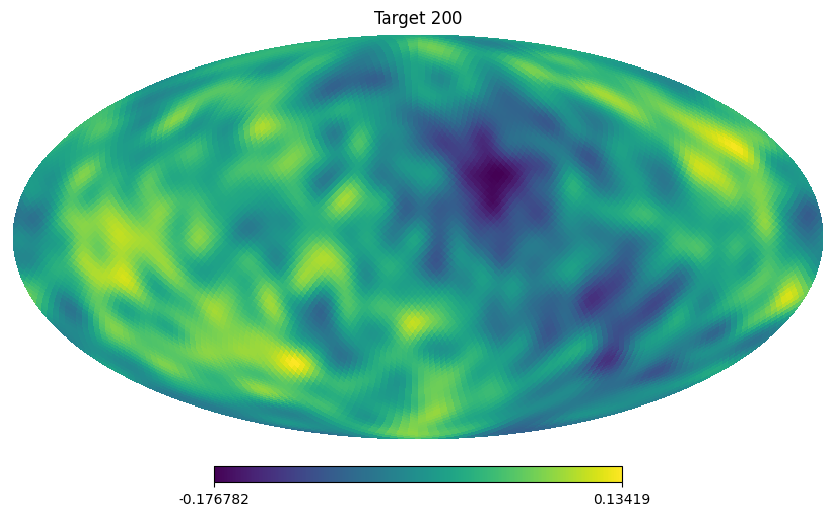

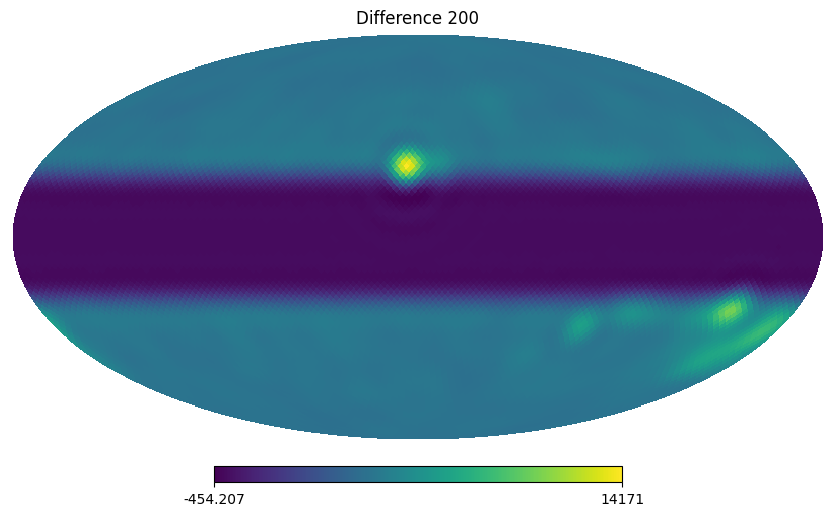

In [11]:
output_dir = '../GNILC/output'
prior_dir = '../GNILC/output'



indices = [0, 50, 100, 150, 200]

for i in indices:
    wavelet_file = f'wavelet_{i}.fits'
    target_file = f'wavelet_target_{i}.fits'

    # Load wavelet map
    w_data = fits.getdata(os.path.join(output_dir, wavelet_file), 1)  # HDU 1 as example
    t_data = fits.getdata(os.path.join(output_dir, target_file), 1)

    print(f"{wavelet_file} shape: {w_data.shape}, min: {w_data.min()}, max: {w_data.max()}")
    print(f"{target_file} shape: {t_data.shape}, min: {t_data.min()}, max: {t_data.max()}")

    # Plot GNILC vs target
    hp.mollview(w_data, title=f'GNILC {i}')
    hp.mollview(t_data, title=f'Target {i}')
    
    # Difference
    diff = w_data - t_data
    hp.mollview(diff, title=f'Difference {i}')

In [13]:
for idx in indices:
    w_file = f'wavelet_{idx}.fits'
    p_file = f'wavelet_target_{idx}.fits'

    w_data = fits.getdata(os.path.join(output_dir, w_file), ext=1)
    p_data = fits.getdata(os.path.join(prior_dir, p_file), ext=1)

    print(f"\nWavelet scale {idx}")
    print(f"{w_file} mean={np.mean(w_data):.3e}, std={np.std(w_data):.3e}, min={np.min(w_data):.3e}, max={np.max(w_data):.3e}, rms={np.sqrt(np.mean(w_data**2)):.3e}")
    print(f"{p_file} mean={np.mean(p_data):.3e}, std={np.std(p_data):.3e}, min={np.min(p_data):.3e}, max={np.max(p_data):.3e}, rms={np.sqrt(np.mean(p_data**2)):.3e}")


Wavelet scale 0
wavelet_0.fits mean=8.544e+05, std=6.313e+05, min=-5.164e+04, max=1.989e+06, rms=1.062e+06
wavelet_target_0.fits mean=-1.598e-06, std=4.987e-02, min=-1.777e-01, max=1.227e-01, rms=4.987e-02

Wavelet scale 50
wavelet_50.fits mean=5.629e+04, std=4.167e+04, min=-4.968e+03, max=1.684e+05, rms=7.003e+04
wavelet_target_50.fits mean=-1.782e-06, std=4.976e-02, min=-1.609e-01, max=1.284e-01, rms=4.976e-02

Wavelet scale 100
wavelet_100.fits mean=1.528e+04, std=1.135e+04, min=-1.637e+03, max=5.318e+04, rms=1.903e+04
wavelet_target_100.fits mean=-1.080e-06, std=5.016e-02, min=-1.716e-01, max=1.470e-01, rms=5.016e-02

Wavelet scale 150
wavelet_150.fits mean=6.448e+03, std=4.810e+03, min=-7.861e+02, max=2.492e+04, rms=8.045e+03
wavelet_target_150.fits mean=-5.285e-07, std=4.999e-02, min=-1.729e-01, max=1.457e-01, rms=4.999e-02

Wavelet scale 200
wavelet_200.fits mean=3.385e+03, std=2.536e+03, min=-4.543e+02, max=1.417e+04, rms=4.230e+03
wavelet_target_200.fits mean=-4.082e-07, std=

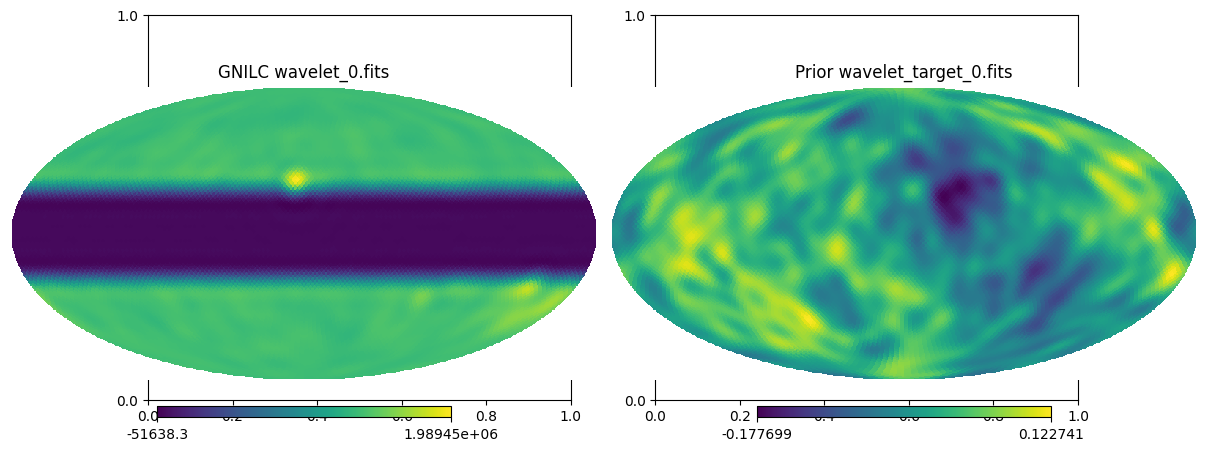

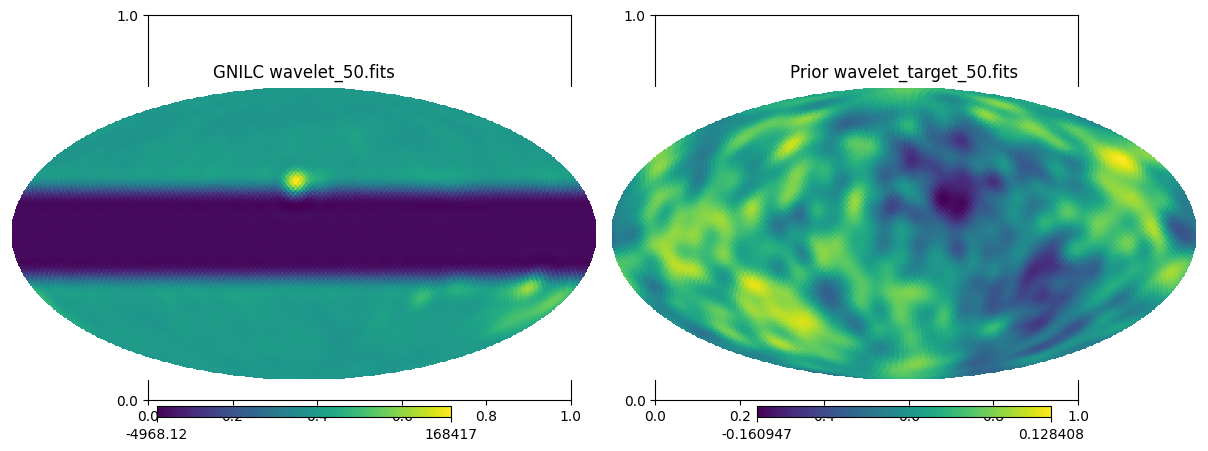

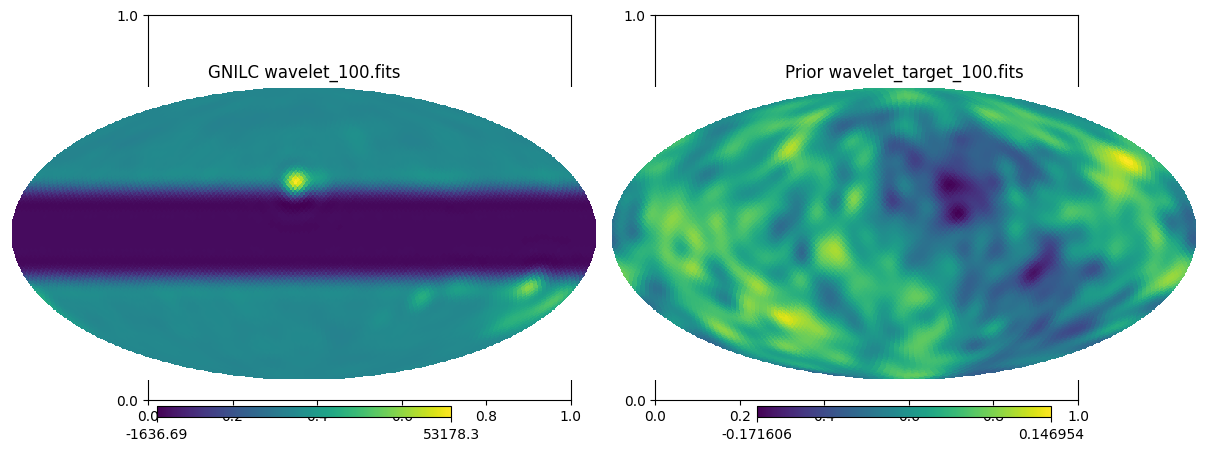

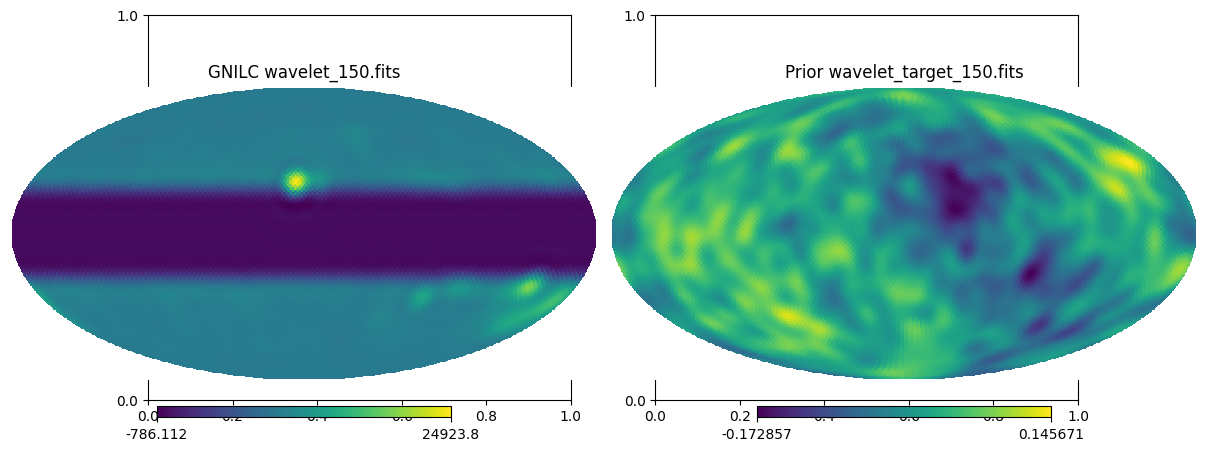

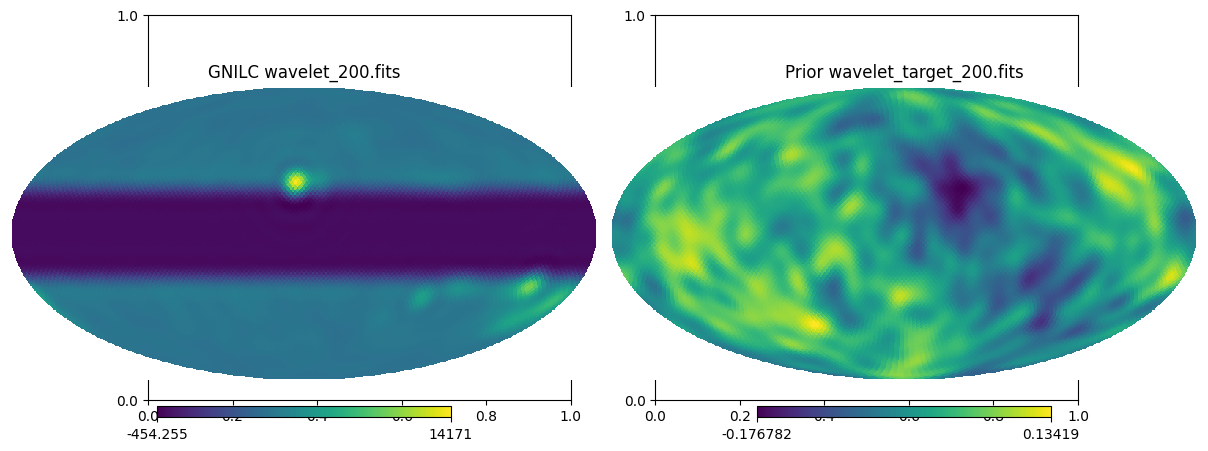

In [15]:
for idx in indices:
    w_file = f'wavelet_{idx}.fits'
    p_file = f'wavelet_target_{idx}.fits'

    w_data = fits.getdata(os.path.join(output_dir, w_file), ext=1)
    p_data = fits.getdata(os.path.join(prior_dir, p_file), ext=1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    hp.mollview(w_data, title=f'GNILC {w_file}', sub=(1,2,1), fig=fig.number)
    hp.mollview(p_data, title=f'Prior {p_file}', sub=(1,2,2), fig=fig.number)

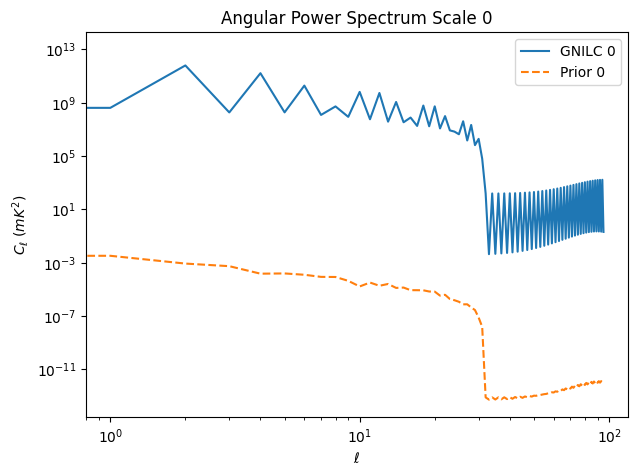

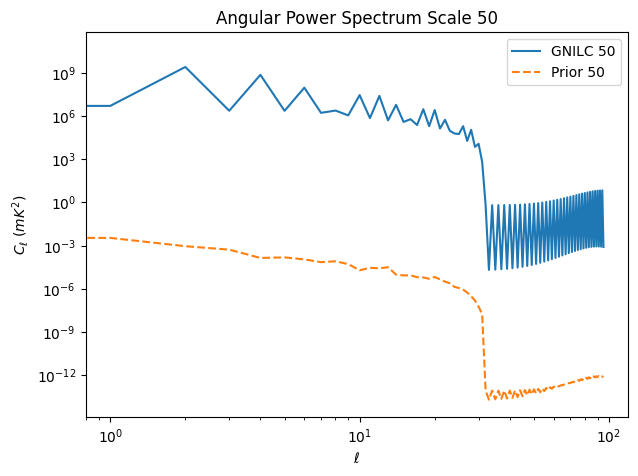

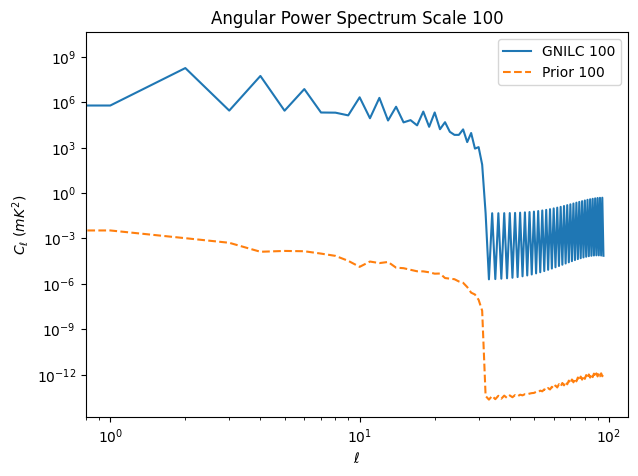

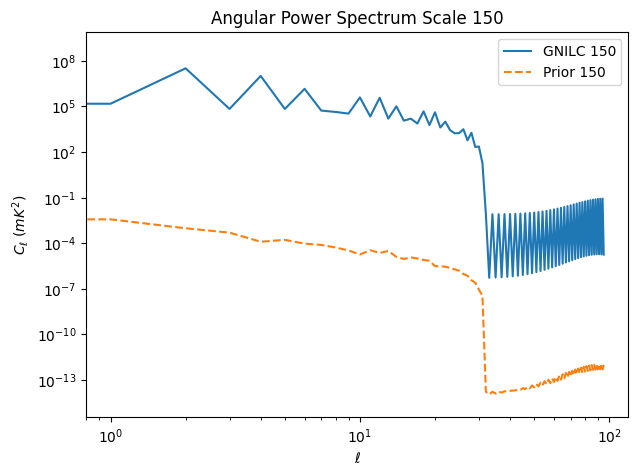

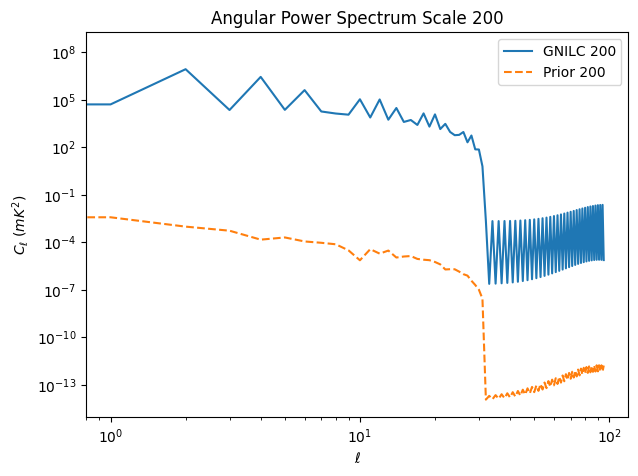

In [20]:
for idx in indices:
    w_file = f'wavelet_{idx}.fits'
    p_file = f'wavelet_target_{idx}.fits'
    
    # Load maps
    w_data = fits.getdata(os.path.join(output_dir, w_file), ext=1)
    p_data = fits.getdata(os.path.join(prior_dir, p_file), ext=1)
    
    # Compute Cl
    cl_w = hp.anafast(w_data)
    cl_p = hp.anafast(p_data)
    
    # Multipole array
    ell = np.arange(len(cl_w))
    
    # Plot
    plt.figure(figsize=(7,5))
    plt.loglog(ell, cl_w, label=f'GNILC {idx}')
    plt.loglog(ell, cl_p, label=f'Prior {idx}', linestyle='--')
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$C_\ell$ $(mK^2)$')
    plt.title(f'Angular Power Spectrum Scale {idx}')
    plt.legend()
    plt.show()

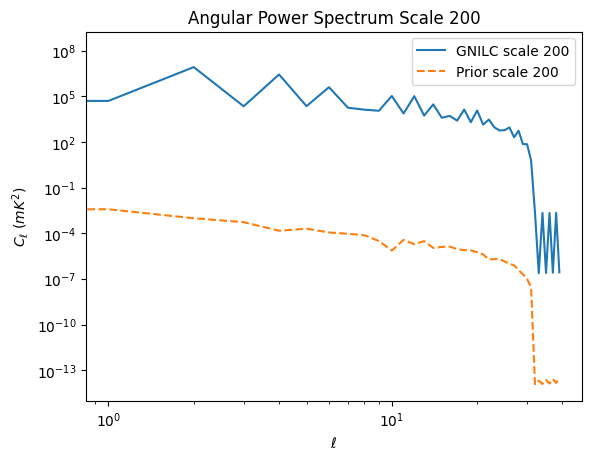

In [21]:
ell_max = 40 

# Truncate arrays
cl_w = cl_w[:ell_max]
cl_p = cl_p[:ell_max]
ell_trunc = np.arange(len(cl_w))

plt.loglog(ell_trunc, cl_w, label=f'GNILC scale {idx}')
plt.loglog(ell_trunc, cl_p, linestyle='--', label=f'Prior scale {idx}')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$ $(mK^2)$')
plt.title(f'Angular Power Spectrum Scale {idx}')
plt.legend()
plt.show()